In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sqlite3
import numpy as np

In [2]:
df = pd.read_csv("/Users/thomassimmons/c/d/datasets/retail_store_sales.csv")

In [3]:
df.head()

,Transaction ID,Customer ID,Category,Item,Price Per Unit,Quantity,Total Spent,Payment Method,Location,Transaction Date,Discount Applied
0,TXN_6867343,CUST_09,Patisserie,Item_10_PAT,18.5,10.0,185.0,Digital Wallet,Online,2024-04-08,True
1,TXN_3731986,CUST_22,Milk Products,Item_17_MILK,29.0,9.0,261.0,Digital Wallet,Online,2023-07-23,True
2,TXN_9303719,CUST_02,Butchers,Item_12_BUT,21.5,2.0,43.0,Credit Card,Online,2022-10-05,False
3,TXN_9458126,CUST_06,Beverages,Item_16_BEV,27.5,9.0,247.5,Credit Card,Online,2022-05-07,NaN
4,TXN_4575373,CUST_05,Food,Item_6_FOOD,12.5,7.0,87.5,Digital Wallet,Online,2022-10-02,False


In [5]:
df.columns = df.columns.str.strip().str.replace(" ", "_").str.lower()

In [7]:
df.columns

Index(['transaction_id', 'customer_id', 'category', 'item', 'price_per_unit',
       'quantity', 'total_spent', 'payment_method', 'location',
       'transaction_date', 'discount_applied'],
      dtype='object')

In [15]:
df.isnull().sum()

transaction_id         0
customer_id            0
category               0
item                1213
price_per_unit       609
quantity             604
total_spent          604
payment_method         0
location               0
transaction_date       0
discount_applied    4199
dtype: int64

In [12]:
df.dropna(subset = ["item", "price_per_unit", "quantity", "total_spent", "discount_applied"])

,transaction_id,customer_id,category,item,price_per_unit,quantity,total_spent,payment_method,location,transaction_date,discount_applied
0,TXN_6867343,CUST_09,Patisserie,Item_10_PAT,18.5,10.0,185.0,Digital Wallet,Online,2024-04-08,True
1,TXN_3731986,CUST_22,Milk Products,Item_17_MILK,29.0,9.0,261.0,Digital Wallet,Online,2023-07-23,True
2,TXN_9303719,CUST_02,Butchers,Item_12_BUT,21.5,2.0,43.0,Credit Card,Online,2022-10-05,False
4,TXN_4575373,CUST_05,Food,Item_6_FOOD,12.5,7.0,87.5,Digital Wallet,Online,2022-10-02,False
6,TXN_3652209,CUST_07,Food,Item_1_FOOD,5.0,8.0,40.0,Credit Card,In-store,2023-06-10,True
...,...,...,...,...,...,...,...,...,...,...,...
12566,TXN_6298574,CUST_01,Milk Products,Item_1_MILK,5.0,4.0,20.0,Cash,Online,2023-05-09,False
12567,TXN_4890318,CUST_25,Butchers,Item_3_BUT,8.0,5.0,40.0,Credit Card,In-store,2023-03-28,False
12569,TXN_2318174,CUST_18,Patisserie,Item_1_PAT,5.0,9.0,45.0,Digital Wallet,In-store,2024-05-13,False
12571,TXN_4009414,CUST_03,Beverages,Item_2_BEV,6.5,9.0,58.5,Cash,Online,2022-08-12,False


In [17]:
df.shape

(12575, 11)

In [33]:
df.isnull().sum()

transaction_id      0
customer_id         0
category            0
item                0
price_per_unit      0
quantity            0
total_spent         0
payment_method      0
location            0
transaction_date    0
discount_applied    0
dtype: int64

In [21]:
df['item'] = df['item'].fillna('Unknown Item')

In [24]:
df['discount_applied'] = df['discount_applied'].fillna(False)

In [25]:
df['discount_applied'] = df['discount_applied'].astype(bool)

In [26]:
df.dtypes

transaction_id       object
customer_id          object
category             object
item                 object
price_per_unit      float64
quantity            float64
total_spent         float64
payment_method       object
location             object
transaction_date     object
discount_applied       bool
dtype: object

In [28]:
df['transaction_date'] = pd.to_datetime(df['transaction_date'], errors='coerce')

In [31]:
df = df.dropna(subset=['transaction_date'])

In [34]:
df = df.dropna(subset=['price_per_unit', 'quantity', 'total_spent'])

In [35]:
df['month'] = df['transaction_date'].dt.to_period("M")

In [36]:
df[df.duplicated]

,transaction_id,customer_id,category,item,price_per_unit,quantity,total_spent,payment_method,location,transaction_date,discount_applied,month


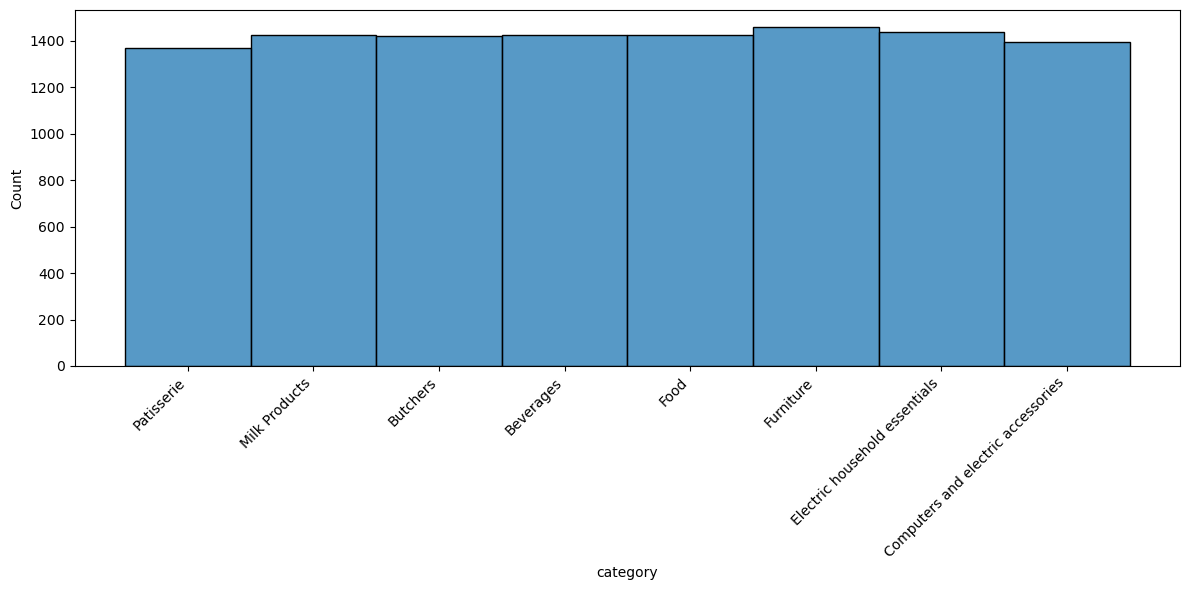

In [ ]:
plt.figure(figsize=(12, 6)) 
sns.histplot(df['category'])
plt.xticks(rotation=45, ha='right')  
plt.tight_layout() 
plt.show()

In [40]:
df.columns

Index(['transaction_id', 'customer_id', 'category', 'item', 'price_per_unit',
       'quantity', 'total_spent', 'payment_method', 'location',
       'transaction_date', 'discount_applied', 'month'],
      dtype='object')